In [1]:
import time
import numpy as np
import pandas as pd
import os

from hydesign.assembly.hpp_assembly import hpp_model
from hydesign.examples import examples_filepath

In [2]:
sites = pd.read_csv('overview.csv', index_col=0)
example = 0

ex_site = sites.iloc[int(example),:]

print('Selected example site:')
print('---------------------------------------------------')
print(ex_site.T)

longitude = ex_site['longitude']
latitude = ex_site['latitude']
altitude = ex_site['altitude']
input_ts_fn = os.path.join(os.getcwd(), ex_site['input_ts_fn'])
sim_pars_fn = os.path.join(os.getcwd(), ex_site['sim_pars_fn'])

hpp = hpp_model(
        sim_pars_fn,
        latitude = latitude,
        longitude = longitude,
        altitude = altitude,
        num_batteries = 10,
        work_dir = './',
        input_ts_fn = input_ts_fn,
        save_battry_rf_filename='battery_rf.csv',
)

inputs = dict(
clearance =	60,
sp =	287.6391934,
p_rated =	10,
Nwt	=	25,
wind_MW_per_km2 =	4.782274215,
solar_MW =	223.2191223,
surface_tilt =	50,
surface_azimuth = 210,
DC_AC_ratio	=1.295598428,
b_P =75.27402422,
b_E_h=	4.451612903,
cost_of_battery_P_fluct_in_peak_price_ratio	=0.580645161,)

"""
        inputs = dict(
        clearance =	60,
        sp =	287.6391934,
        p_rated =	10,
        Nwt	=	25,
        wind_MW_per_km2 =	4.782274215,
        solar_MW =	223,
        surface_tilt =	50,
        surface_azimuth = 210,
        DC_AC_ratio	=1,
        b_P =75,
        b_E_h=	4,
        cost_of_battery_P_fluct_in_peak_price_ratio	=0.580645161,)
        """

Selected example site:
---------------------------------------------------
case                                  Europe
name                        France_good_wind
longitude                          -0.864258
latitude                           48.744116
altitude                                 302
input_ts_fn            input_ts_modified.csv
sim_pars_fn           hyd_input/hpp_pars.yml
price_fn         hyd_input/2030-EL_PRICE.csv
price_col                               FR_R
H2_demand_col        hyd_input/H2_demand.csv
Name: 0, dtype: object

Fixed parameters on the site
-------------------------------
longitude = -0.864258
latitude = 48.744116
altitude = 302


'\n        inputs = dict(\n        clearance =\t60,\n        sp =\t287.6391934,\n        p_rated =\t10,\n        Nwt\t=\t25,\n        wind_MW_per_km2 =\t4.782274215,\n        solar_MW =\t223,\n        surface_tilt =\t50,\n        surface_azimuth = 210,\n        DC_AC_ratio\t=1,\n        b_P =75,\n        b_E_h=\t4,\n        cost_of_battery_P_fluct_in_peak_price_ratio\t=0.580645161,)\n        '

In [3]:
start = time.time()
outs = hpp.evaluate(**inputs)
hpp.print_design([v for k,v in inputs.items()], outs)
end = time.time()
print('exec. time [min]:', (end - start)/60 )
print(hpp.prob['NPV_over_CAPEX'])


Design:
---------------
clearance [m]: 60.000
sp [W/m2]: 287.639
p_rated [MW]: 10.000
Nwt: 25.000
wind_MW_per_km2 [MW/km2]: 4.782
solar_MW [MW]: 223.219
surface_tilt [deg]: 50.000
surface_azimuth [deg]: 210.000
DC_AC_ratio: 1.296
b_P [MW]: 75.274
b_E_h [h]: 4.452
cost_of_battery_P_fluct_in_peak_price_ratio: 0.581


NPV_over_CAPEX: 0.133
NPV [MEuro]: 57.149
IRR: 0.072
LCOE [Euro/MWh]: 33.649
Revenues [MEuro]: 48.052
CAPEX [MEuro]: 429.258
OPEX [MEuro]: 6.900
Wind CAPEX [MEuro]: 275.586
Wind OPEX [MEuro]: 5.599
PV CAPEX [MEuro]: 65.197
PV OPEX [MEuro]: 1.301
Batt CAPEX [MEuro]: 21.810
Batt OPEX [MEuro]: 0.000
Shared CAPEX [MEuro]: 66.665
Shared OPEX [MEuro]: 0.000
penalty lifetime [MEuro]: 0.000
AEP [GWh]: 1202.856
GUF: 0.458
grid [MW]: 300.000
wind [MW]: 250.000
solar [MW]: 223.219
Battery Energy [MWh]: 335.091
Battery Power [MW]: 75.274
Total curtailment [GWh]: 56.301
Total curtailment with deg [GWh]: 124.901
Awpp [km2]: 52.276
Apvp [km2]: 2.737
Plant area [km2]: 52.276
Rotor diam [m]

In [17]:
b_t = hpp.prob.get_val('ems.b_t')
b_E_SOC_t = hpp.prob.get_val('ems.b_E_SOC_t')
wind_t = hpp.prob.get_val('ems.wind_t')
solar_t = hpp.prob.get_val('pvp.solar_t')
hpp_t = hpp.prob.get_val('ems.hpp_t')
hpp_curt_t = hpp.prob.get_val('ems.hpp_curt_t')
price_t = hpp.prob.get_val('ems.price_t')

In [18]:
from hopp.simulation import HoppInterface

In [20]:
hi = HoppInterface(os.path.join(os.getcwd(), "hopp_input/08-wind-solar-france.yaml"))

FLORIS is the system model...


In [21]:
hi.system.wind._financial_model.FinancialParameters.real_discount_rate = 6
hi.system.pv._financial_model.FinancialParameters.real_discount_rate = 6
hi.system.battery._financial_model.FinancialParameters.real_discount_rate = 6
hi.system.grid._financial_model.FinancialParameters.real_discount_rate = 6

hi.system.wind._financial_model.FinancialParameters.inflation_rate = 2
hi.system.pv._financial_model.FinancialParameters.inflation_rate = 2
hi.system.battery._financial_model.FinancialParameters.inflation_rate = 2
hi.system.grid._financial_model.FinancialParameters.inflation_rate = 2

# Federal tax rate 21%, set state tax rate to 4% (total 25% tax rate)
hi.system.wind._financial_model.FinancialParameters.state_tax_rate = [4]*25
hi.system.pv._financial_model.FinancialParameters.state_tax_rate = [4]*25
hi.system.battery._financial_model.FinancialParameters.state_tax_rate = [4]*25
hi.system.grid._financial_model.FinancialParameters.state_tax_rate = [4]*25

In [22]:
hi.simulate(25)

Simulating wind farm output in FLORIS...


In [23]:
hybrid_plant = hi.system

annual_energies = hybrid_plant.annual_energies
npvs = hybrid_plant.net_present_values
cf = hybrid_plant.capacity_factors
total_revenue = hybrid_plant.grid.total_revenue
revenue_gen = np.array(hybrid_plant.grid._financial_model.value('revenue_gen')) / 1e3
generation_profile = hybrid_plant.grid.generation_profile

wind_installed_cost = hybrid_plant.wind.total_installed_cost
solar_installed_cost = hybrid_plant.pv.total_installed_cost
battery_installed_cost = hybrid_plant.battery.total_installed_cost
hybrid_installed_cost = hybrid_plant.grid.total_installed_cost
OM_cost = hybrid_plant.om_total_expenses
generation_curtailed = hybrid_plant.grid.generation_curtailed

print("Wind Installed Cost [M$]: {}".format(wind_installed_cost/1e6))
print("Solar Installed Cost [M$]: {}".format(solar_installed_cost/1e6))
print("Battery Installed Cost [M$]: {}".format(battery_installed_cost/1e6))
print("Hybrid Installed Cost [M$]: {}\n".format(hybrid_installed_cost/1e6))

print("Wind NPV [M$]: {}".format(hybrid_plant.net_present_values.wind/1e6))
print("Solar NPV [M$]: {}".format(hybrid_plant.net_present_values.pv/1e6))
print("Hybrid NPV [M$]: {}\n".format(hybrid_plant.net_present_values.hybrid/1e6))

print("Annual Energies [kW]",annual_energies)
print("Capacity Factors",cf)
print("NPV [$]", npvs)

print("LCOE [cents/kWh]", hybrid_plant.lcoe_real,"\n")

print("Hybrid LCOE [$/MWh]", hybrid_plant.lcoe_real['hybrid']*10)

print("Revenues_HOPP [M€]:", np.array(total_revenue[1:26]) / 1e6)

Wind Installed Cost [M$]: 225.0
Solar Installed Cost [M$]: 51.29
Battery Installed Cost [M$]: 16.3875
Hybrid Installed Cost [M$]: 292.6775

Wind NPV [M$]: 10.994256239854932
Solar NPV [M$]: 84.05166084266281
Hybrid NPV [M$]: 95.42336231404448

Annual Energies [kW] {"pv": 276848223.3589655, "wind": 390578180.272393, "battery": -3186466.0621476993, "hybrid": 664109648.7756325}
Capacity Factors {"pv": 18.423669060684276, "wind": 17.834620103762237, "battery": 0, "hybrid": 15.271017809279808}
NPV [$] {"pv": 84051660.84266281, "wind": 10994256.239854932, "battery": -54783.00334594399, "hybrid": 95423362.31404448}
LCOE [cents/kWh] {"pv": 0.38596563316146215, "wind": 3.4214618758169446, "battery": 5.055841427372156, "hybrid": 2.491875214874676} 

Hybrid LCOE [$/MWh] 24.918752148746762
Revenues_HOPP [M€]: [26.83687515 27.10524391 27.37629634 27.65005931 27.9265599  28.2058255
 28.48788376 28.77276259 29.06049022 29.35109512 29.64460607 29.94105213
 30.24046265 30.54286728 30.84829595 31.156778

In [24]:
import json

with open("singleowner.json", 'w') as f:
    dat = hybrid_plant.grid._financial_model.export()
    d = dict()
    for k, v in dat.items():
        d.update(v)
    json.dump(d, f)

In [25]:
euro_per_dollar = 1.0
df = pd.DataFrame({'HOPP': [wind_installed_cost/1e6*euro_per_dollar,
                            solar_installed_cost/1e6*euro_per_dollar,
                            battery_installed_cost/1e6*euro_per_dollar,
                            hybrid_installed_cost/1e6*euro_per_dollar,
                            hybrid_plant.net_present_values.hybrid/1e6*euro_per_dollar,
                           ],
                   'HyDesign': [float(hpp.prob['wpp_cost.CAPEX_w']/1e6),
                                float(hpp.prob['pvp_cost.CAPEX_s']/1e6),
                                float(hpp.prob['battery_cost.CAPEX_b']/1e6),
                                float(hpp.prob['CAPEX']/1e6),
                                float(hpp.prob['NPV']/1e6),
                                ] },
                  index=['CAPEX Wind [M€]',
                         'CAPEX Solar [M€]',
                         'CAPEX Battery [M€]',
                         'CAPEX Hybrid [M€]',
                         'NPV Hybrid [M€]',
                        ])

C:\Users\s223344\AppData\Local\Temp\ipykernel_22276\3229776475.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  'HyDesign': [float(hpp.prob['wpp_cost.CAPEX_w']/1e6),
C:\Users\s223344\AppData\Local\Temp\ipykernel_22276\3229776475.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  float(hpp.prob['pvp_cost.CAPEX_s']/1e6),
C:\Users\s223344\AppData\Local\Temp\ipykernel_22276\3229776475.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  float(hpp.prob['battery_cost

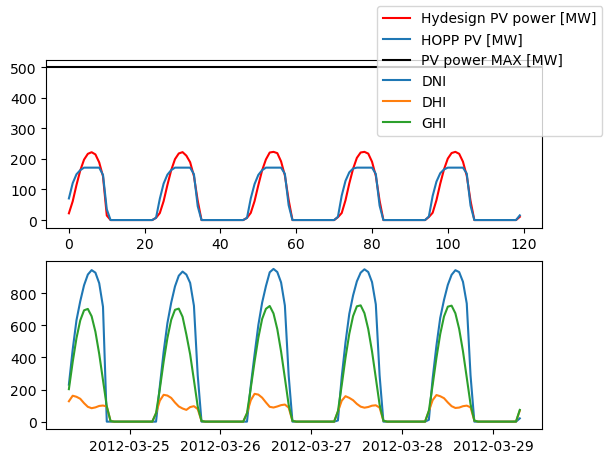

In [26]:
import matplotlib.pyplot as plt
solar_t = hpp.prob['pvp.solar_t']
weather = pd.read_csv(input_ts_fn, index_col=0, parse_dates=True)
dni = weather["dni"]
dhi = weather["dhi"]
ghi = weather["ghi"]

time_start = 2000
n_days = 5
fig, ax = plt.subplots(2,1)
ax[0].plot(solar_t[time_start: time_start + n_days * 24], color='red', label='Hydesign PV power [MW]')
ax[0].plot(np.array(hybrid_plant.pv.generation_profile[time_start: time_start + 24 *n_days]) / 1e3, label='HOPP PV [MW]')
ax[0].axhline(500, color='black', label='PV power MAX [MW]')
ax[1].plot(dni[time_start: time_start + n_days * 24], label='DNI')
ax[1].plot(dhi[time_start: time_start + n_days * 24], label='DHI')
ax[1].plot(ghi[time_start: time_start + n_days * 24], label='GHI')
fig.legend()

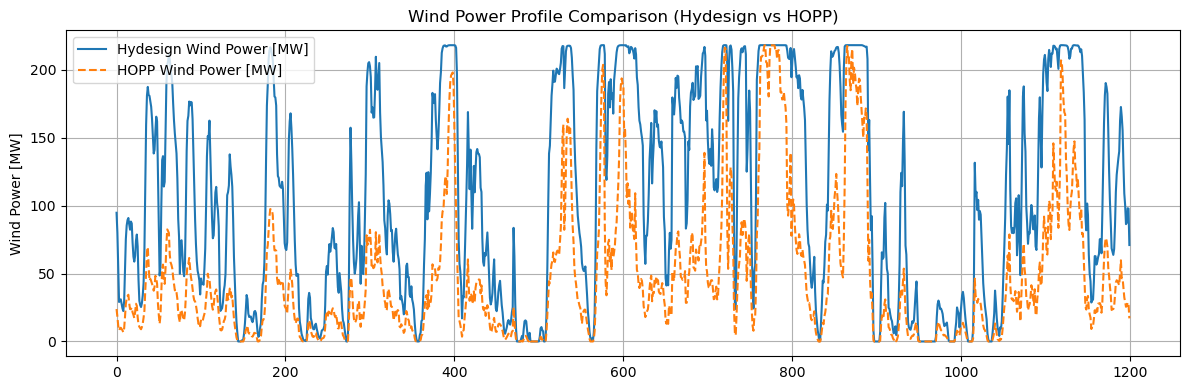

In [31]:
wind_t = hpp.prob['wind_t']     
wind_hopp = np.array(hybrid_plant.wind.generation_profile) / 1e3 

time_start = 2000
n_days = 50
start = time_start
end = time_start + n_days * 24

# --- Plot ---
plt.figure(figsize=(12, 4))
plt.plot(wind_t[start:end], label="Hydesign Wind Power [MW]")
plt.plot(wind_hopp[start:end], label="HOPP Wind Power [MW]", linestyle='--')

plt.title("Wind Power Profile Comparison (Hydesign vs HOPP)")
plt.ylabel("Wind Power [MW]")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
df

,HOPP,HyDesign
CAPEX Wind [M€],225.000000,275.586490
CAPEX Solar [M€],51.290000,65.196875
CAPEX Battery [M€],16.387500,21.810038
CAPEX Hybrid [M€],292.677500,429.258318
NPV Hybrid [M€],95.423362,57.148656


In [29]:
hpp.prob.model.list_outputs()

49 Explicit Output(s) in 'model'

varname                               val                   prom_name                 
------------------------------------  --------------------  --------------------------
abl
  wst                                 |817.46032848|        wst                       
genericWT
  ws                                  |117.70938833|        ws                        
  pc                                  |5.71613057|          pc                        
  ct                                  |3.31364971|          ct                        
genericWake
  pcw                                 |1413.01276995|       pcw                       
wpp
  wind_t                              |12206.75107181|      wind_t                    
pvp
  solar_t                             |6186.49867768|       solar_t                   
  Apvp                                [2.73666644]          Apvp                      
ems
  wind_t_ext                          |61033.75535903|    

[('abl.wst',
  {'val': array([12.5730722 , 11.58387731, 11.8185967 , ..., 12.50101548,
          13.00332079, 13.29007885], shape=(8760,)),
   'prom_name': 'wst'}),
 ('battery_cost.CAPEX_b',
  {'val': array([21810038.26151117]), 'prom_name': 'CAPEX_b'}),
 ('battery_cost.OPEX_b', {'val': array([0.]), 'prom_name': 'OPEX_b'}),
 ('battery_degradation.SoH',
  {'val': array([0.99995228, 0.9999375 , 0.99992271, ..., 0.7351049 , 0.73510196,
          0.73510196], shape=(219000,)),
   'prom_name': 'SoH'}),
 ('battery_degradation.n_batteries',
  {'val': array([2.]), 'prom_name': 'n_batteries'}),
 ('battery_loss_in_capacity_due_to_temp.SoH_all',
  {'val': array([0.97811107, 0.97733277, 0.97680722, ..., 0.69867629, 0.69832812,
          0.69823858], shape=(219000,)),
   'prom_name': 'SoH_all'}),
 ('battery_with_reliability.b_t_rel',
  {'val': array([-28.49411713, -28.49411713, -28.49411713, ...,   0.        ,
          -29.7329918 , -29.7329918 ], shape=(219000,)),
   'prom_name': 'b_t_rel'}),
 ('

In [30]:
import numpy as np
import pandas as pd

outputs_keys = [ 
    "NPV", "LCOE", "Revenues", "CAPEX", "OPEX",
    "CAPEX_wind", "OPEX_wind", "CAPEX_solar", "OPEX_solar",
    "CAPEX_battery", "OPEX_battery", "CAPEX_infra_elec", "OPEX_infra_elec",
    "mean_AEP", "wind_capacity", "solar_capacity",
    "battery_power_capacity", "battery_energy_capacity", 
    "total_curtailment"
]

# --- Global outputs ---
price_t_lifetime = np.tile(price_t, 25)

outputs_hydesign = {
    "NPV": float(hpp.prob['NPV']/1e6),
    "LCOE": float(hpp.prob['LCOE']),  
    "Revenues": float(np.sum(hpp_t * price_t_lifetime)/1e6), 
    "CAPEX": float(hpp.prob['CAPEX']/1e6),
    "OPEX": float(hpp.prob['OPEX'] * 25/1e6),  
    "CAPEX_wind": float(hpp.prob['wpp_cost.CAPEX_w']/1e6),
    "OPEX_wind": float(hpp.prob['wpp_cost.OPEX_w'] * 25/1e6),
    "CAPEX_solar": float(hpp.prob['pvp_cost.CAPEX_s']/1e6),
    "OPEX_solar": float(hpp.prob['pvp_cost.OPEX_s'] * 25/1e6),
    "CAPEX_battery": float(hpp.prob['battery_cost.CAPEX_b']/1e6),
    "OPEX_battery": float(hpp.prob['battery_cost.OPEX_b'] * 25/1e6),
    "CAPEX_infra_elec": float(hpp.prob['finance.CAPEX_el']/1e6),
    "OPEX_infra_elec": float(hpp.prob['finance.OPEX_el'] * 25/1e6),
    "mean_AEP": float(np.sum(wind_t + solar_t)/25),  
    "wind_capacity": float(inputs['Nwt'] * inputs['p_rated']), 
    "solar_capacity": float(inputs['solar_MW']),
    "battery_power_capacity": float(inputs['b_P']),
    "battery_energy_capacity": float(inputs['b_E_h']*inputs['b_P']),
    "total_curtailment": float(np.sum(hpp_curt_t)/1e9),
}

outputs_hopp = {
    "NPV": float(hybrid_plant.net_present_values.hybrid)/1e6,
    "LCOE": float(hybrid_plant.lcoe_real['hybrid']*10),
    "Revenues": float(np.sum(total_revenue))/1e6,
    "CAPEX": float(hybrid_installed_cost)/1e6,
    "OPEX": float(sum(OM_cost["hybrid"]))/1e6,
    "CAPEX_wind": float(wind_installed_cost)/1e6,
    "OPEX_wind": float(sum(OM_cost["wind"]))/1e6,
    "CAPEX_solar": float(solar_installed_cost)/1e6,
    "OPEX_solar": float(sum(OM_cost["pv"]))/1e6,
    "CAPEX_battery": float(battery_installed_cost)/1e6,
    "OPEX_battery": float(sum(OM_cost["battery"]))/1e6,
    "CAPEX_infra_elec": float(hybrid_installed_cost - wind_installed_cost - solar_installed_cost - battery_installed_cost)/1e6,
    "OPEX_infra_elec": float(sum(OM_cost["hybrid"]) - sum(OM_cost["wind"]) - sum(OM_cost["pv"]) - sum(OM_cost["battery"]))/1e6,
    "mean_AEP": float(np.mean(hybrid_plant.annual_energies.hybrid)), 
    "wind_capacity": float(hybrid_plant.wind.config.num_turbines * hybrid_plant.wind.config.turbine_rating_kw)/1e3,
    "solar_capacity": float(hybrid_plant.pv.config.system_capacity_kw)/1e3,
    "battery_power_capacity": float(hybrid_plant.battery.config.system_capacity_kw)/1e3,
    "battery_energy_capacity": float(hybrid_plant.battery.config.system_capacity_kwh)/1e3,
    "total_curtailment": float(sum(hybrid_plant.grid.generation_curtailed))/1e6,
}

outputs_keys_overall = [key for key in outputs_keys if key != "mean_AEP"]

df_hopp_hydesign = pd.DataFrame({
    "Output": outputs_keys_overall,
    "Hydesign": [outputs_hydesign[key] for key in outputs_keys_overall],
    "HOPP": [outputs_hopp[key] for key in outputs_keys_overall]
})

years = list(range(1, 26))

hopp_annual_revenues = np.array(hybrid_plant.grid._financial_model.value('revenue_gen')) / 1e6
hpp_t_array = np.array(hpp_t)
price_t_array = np.array(price_t)
hydesign_annual_revenues = [
    np.sum(hpp_t_array[year*8760:(year+1)*8760] * price_t_array) / 1e6
    for year in range(25)
]

hopp_annual_opex = np.array(OM_cost["hybrid"]) / 1e6
hydesign_annual_opex = [float(hpp.prob['OPEX']) / 1e6] * 25

hydesign_annual_AEP = np.array([np.sum(wind_t[year*8760:(year+1)*8760] + solar_t[year*8760:(year+1)*8760])/1e3 for year in range(25)])

hopp_annual_AEP = np.array([np.sum(hybrid_plant.pv.generation_profile[year*8760:(year+1)*8760] + hybrid_plant.wind.generation_profile[year*8760:(year+1)*8760])/1e3 for year in range(25)])

df_annual = pd.DataFrame({
    "Year": years,
    "Revenues_Hydesign [M€]": hydesign_annual_revenues,
    "Revenues_HOPP [M€]": np.array(total_revenue[1:26]) / 1e6,
    "OPEX_Hydesign [M€]": hydesign_annual_opex,
    "OPEX_HOPP [M€]": hopp_annual_opex[1:26],
    "AEP_Hydesign [MWh]": hydesign_annual_AEP,
    "AEP_HOPP [MWh]": hopp_annual_AEP
})

print(wind_t[0:8760])
print(hybrid_plant.wind.generation_profile[0:8760])

with pd.ExcelWriter("compare_hydesign_hopp_france.xlsx", engine='openpyxl') as writer:
    df_hopp_hydesign.to_excel(writer, sheet_name='Overall_Comparison', index=False)
    df_annual.to_excel(writer, sheet_name='Annual_Comparison', index=False)

print("Export done: compare_hydesign_hopp.xlsx with two sheets")
print("  - Overall_Comparison: Global metrics (mean_AEP removed)")
print("  - Annual_Comparison: Annual Revenues, OPEX, and AEP")

C:\Users\s223344\AppData\Local\Temp\ipykernel_22276\2139344314.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "NPV": float(hpp.prob['NPV']/1e6),
C:\Users\s223344\AppData\Local\Temp\ipykernel_22276\2139344314.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "LCOE": float(hpp.prob['LCOE']),
C:\Users\s223344\AppData\Local\Temp\ipykernel_22276\2139344314.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "CAPEX": float(hpp.prob['CAPEX']/1e6),
C:\Users\s2233

[216.63691369 211.60142827 213.3433593  ... 216.51662194 217.35208738
 217.56441215]
[np.float64(102083.03379984885), np.float64(78452.62077025774), np.float64(87409.6645140328), np.float64(92451.21811954047), np.float64(89101.81832647978), np.float64(86573.83026688607), np.float64(86229.02986102364), np.float64(96455.32668087792), np.float64(89385.01760454678), np.float64(95338.46122629107), np.float64(103700.73154117471), np.float64(143694.22021420833), np.float64(174105.3815912146), np.float64(182190.65066798637), np.float64(206489.89581619005), np.float64(175707.84372799023), np.float64(176267.03456687188), np.float64(186976.34608702283), np.float64(166760.73680020822), np.float64(135726.49415932957), np.float64(64316.53686672023), np.float64(73697.30582393263), np.float64(75016.92914221482), np.float64(109690.60389674244), np.float64(92127.78303248108), np.float64(80078.79676408666), np.float64(84785.34520617628), np.float64(87357.00737235564), np.float64(97350.77830491996), np.fl